「RとStanで始めるベイズ統計モデリングによるデータ分析入門 実践編第6章」を対象に，公開されているR，Stanのコードをpython，pystanのコードへと書き直した一例です。Stanの代わりにpystanを，bayesplotの代わりにarvizパッケージを利用しています。

本ページでは公開されていない書籍の内容については一切触れません。理論や詳しい説明は書籍を参照してください。

なお，こちらで紹介しているコードには誤りが含まれる可能性があります。内容やコードについてお気づきの点等ございましたら，ご指摘いただけると幸いです。

# 分析の準備

## パッケージの読み込み

In [14]:
import arviz
import pystan
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'Meiryo'
import seaborn as sns

# データの読み込みと図示

## 分析対象のデータ

In [2]:
sales_weather = pd.read_csv('3-6-1-beer-sales-3.csv')
sales_weather.head(n=3)

,sales,weather
0,48.5,cloudy
1,64.8,cloudy
2,85.8,cloudy


## データの要約

In [10]:
display(sales_weather.describe())
display(sales_weather.describe(include=object))

,sales
count,150.000000
mean,69.587333
std,19.208416
min,25.200000
25%,56.125000
50%,68.850000
75%,79.950000
max,116.000000


,weather
count,150
unique,3
top,cloudy
freq,50


## 図示

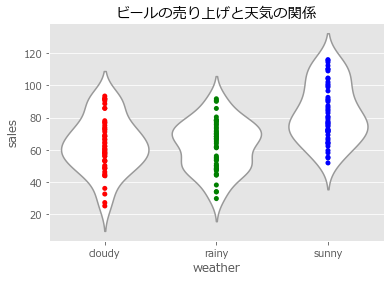

In [37]:
plt.figure()
sns.violinplot(x='weather',
               y='sales',
               data=sales_weather,
               inner='point',
               order=['cloudy', 'rainy', 'sunny'],
               color='white')
sns.stripplot(x='weather',
              y='sales',
              data=sales_weather,
              order=['cloudy', 'rainy', 'sunny'],
              palette=['r', 'g', 'b'],
              jitter=0)
plt.title('ビールの売り上げと天気の関係')
plt.show()

# brmsによる分散分析モデルの推定

pythonにbrmsの代用可能なパッケージが知っている範囲内で存在しないため，brmsを利用したコードは省略しています。

# 分散分析モデルのデザイン行列

## デザイン行列の作成

In [53]:
# 天気をダミー変数化
design_mat = pd.get_dummies(sales_weather['weather'], drop_first=True)
# 先頭列に(Intercept)を追加
design_mat.insert(0, '(Intercept)', 1)
design_mat.head(n=3)

,(Intercept),rainy,sunny
0,1,0,0
1,1,0,0
2,1,0,0


## stanに渡すdictの作成

## stanに渡すデータの表示

# 補足：brmsを使わない分散分析モデルの推定

## rstanで分散分析モデルを実行

## 結果の確認